# Error of Markov Chain Sampling

## About Variance and Standard deviation

### <a href='https://en.wikipedia.org/wiki/Variance'>Variance</a>
### <a href='https://en.wikipedia.org/wiki/Standard_deviation'>Standard deviation</a>

## Markov Chain Sampling and Folding

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def data_creating(N, x_i, y_i, delta):
    '''
    I/P: # of data to be created, start_x, start_y, step 
    O/P: data (a list) whose length is N
    '''
    x, y = x_i, y_i
    data = []
    for i in range(N):
        dx = delta * (np.random.random()*2 - 1)
        dy = delta * (np.random.random()*2 - 1)
        if abs(x+dx) < 1 and abs(y+dy) < 1:
            x += dx
            y += dy
        else:
            x = x
            y = y
        if x**2 + y**2 <= 1:
            data.append(1)
        else:
            data.append(0)
    return data

def data_folding_err(data, Nf, delta):
    '''
    I/P: data to be folded, times to fold data, step
    O/P: (1) Return error
         (2) Print mean, est_π, var, std, error 
    '''
    mean = []; var = []; std = []; err = []
    print('\ndelta:{:6f}'.format(delta))
    
    for j in range(Nf):
        temp = []
        for i in range(len(data)):
            temp.append((data[i] - sum(data)/len(data))**2)
        mean.append(sum(data)/len(data))
        var.append(sum(temp)/len(data))
        std.append((sum(temp)/len(data))**0.5)
        err.append((sum(temp)/len(data))**0.5/(len(data)**0.5))
        print('N:{:2d}, mean:{:6f}, est_π:{:6f}, var:{:6f}, std:{:6f}, err:{:6f}'.format(j, mean[j], 4*mean[j], var[j], std[j], err[j]))
        
        new_data = []
        for i in range(len(data)-1):
            if i % 2 == 0:
                new_data.append((data[i]+data[i+1])/2)
        data = new_data
    return err

## Test different delta (step distance)

In [15]:
Num_Sample = 2**14
Num_Fold = 14+1

data_03 = data_creating(Num_Sample, 1.0, 1.0, 0.3)
data_05 = data_creating(Num_Sample, 1.0, 1.0, 0.5)
data_10 = data_creating(Num_Sample, 1.0, 1.0, 1.0)

err_03 = data_folding_err(data_03, Num_Fold, 0.3)
err_05 = data_folding_err(data_05, Num_Fold, 0.5)
err_10 = data_folding_err(data_10, Num_Fold, 1.0)


delta:0.300000
N: 0, mean:0.785828, est_π:3.143311, var:0.168303, std:0.410247, err:0.003205
N: 1, mean:0.785828, est_π:3.143311, var:0.141172, std:0.375729, err:0.004151
N: 2, mean:0.785828, est_π:3.143311, var:0.116438, std:0.341230, err:0.005332
N: 3, mean:0.785828, est_π:3.143311, var:0.091330, std:0.302208, err:0.006678
N: 4, mean:0.785828, est_π:3.143311, var:0.067507, std:0.259821, err:0.008119
N: 5, mean:0.785828, est_π:3.143311, var:0.044811, std:0.211687, err:0.009355
N: 6, mean:0.785828, est_π:3.143311, var:0.024705, std:0.157178, err:0.009824
N: 7, mean:0.785828, est_π:3.143311, var:0.012680, std:0.112604, err:0.009953
N: 8, mean:0.785828, est_π:3.143311, var:0.006492, std:0.080572, err:0.010072
N: 9, mean:0.785828, est_π:3.143311, var:0.002513, std:0.050126, err:0.008861
N:10, mean:0.785828, est_π:3.143311, var:0.001539, std:0.039227, err:0.009807
N:11, mean:0.785828, est_π:3.143311, var:0.001166, std:0.034146, err:0.012072
N:12, mean:0.785828, est_π:3.143311, var:0.00068

## Plot diagram of Folding time vs Error

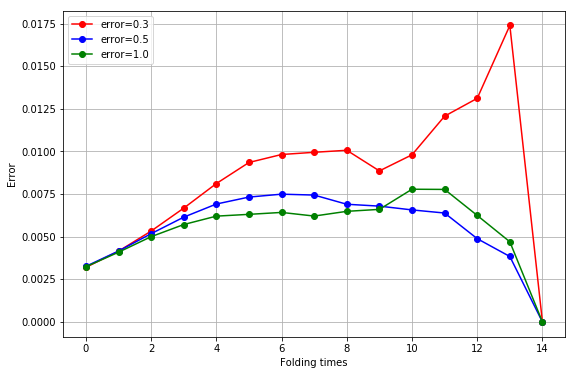

In [21]:
data_num = np.arange(0, Num_Fold, 1)

plt.figure(figsize=(9,6))
plt.plot(data_num, err_03, 'ro-', label=r'error=0.3')
plt.plot(data_num, err_05, 'bo-', label=r'error=0.5')
plt.plot(data_num, err_10, 'go-', label=r'error=1.0')
plt.xlabel(r'Folding times')
plt.ylabel(r'Error')
plt.grid(); plt.legend(); plt.show()